## Chapter 8: Beyond Linear Models
### Section A: Model Selection and Variable Selection
#### MA189 Statistics and Big Data in Birmingham (with R)
##### -- _Blazer Core: City as Classroom Series_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/)


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

In this section, we will learn about the importance of model selection and variable selection in building efficient predictive models. Model selection and variable selection help us choose the most appropriate predictors to improve model interpretability and avoid overfitting.


#### <div class="alert alert-block alert-success"> Objectives </div>
1. Understand different approaches for selecting variables in regression models.
2. Learn how to use forward selection, backward selection, and stepwise selection in R.
3. Explore best subset selection as an alternative method.

#### <div class="alert alert-block alert-success"> Why Model Selection and Variable Selection? </div>
When building predictive models, adding too many variables can lead to overfitting, where the model learns noise in the training data rather than the underlying pattern. By selecting the most relevant predictors, we can:
- Improve model interpretability.
- Reduce overfitting, leading to better generalization on new data.
- Create simpler models that are easier to understand and use.

#### <div class="alert alert-block alert-info"> Criteria for Variable Selection </div>

When selecting variables for regression models, we often evaluate models based on specific criteria that balance predictive accuracy with model simplicity. Some of the commonly used criteria include:

1. **Mean Squared Error (MSE)**:
   - Formula
   $$
    \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
    where:
        - $y_i$ is the actual observed value.
        - $\hat{y}_i$ is the predicted value from the model.
        - $n$ is the number of observations.
   
   - Measures the average of the squared differences between actual and predicted values.
   - Lower MSE values indicate better model performance.
   - MSE is particularly useful for comparing models on the same dataset or when evaluating cross-validation results.

2. **R-squared ($R^2$)**:
   - Formula
       $$
    R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
    $$
    where:
        - $\bar{y}$ is the mean of the observed values.
        - $R^2$ ranges from 0 to 1, with higher values indicating a better fit.

   - Represents the proportion of the variance in the response variable explained by the predictors.
   - Higher $R^2$ values suggest that the model explains a larger portion of the variability in the data.
   - $R^2$ alone can be misleading for model selection, as adding more variables always increases $R^2$, regardless of whether they improve model performance.

3. **Adjusted R-squared**:
   - Formula
      $$
    \text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \frac{n - 1}{n - p - 1}
    $$
    where:
        - $p$ is the number of predictors.
        - Adjusted $R^2$ penalizes excessive complexity by considering the number of predictors in the model. A higher Adjusted $R^2$ suggests a better model fit while accounting for model complexity.

   - Adjusted $R^2$ accounts for the number of predictors in the model, penalizing excessive model complexity.
   - It is especially useful when comparing models with different numbers of predictors, as it provides a better measure of model quality than $R^2$ alone.
   - A higher Adjusted R² suggests a better model fit while accounting for model complexity.



We'll use the `mtcars` dataset for demonstration. Our goal is to build a model to predict miles per gallon (`mpg`) based on other features in the dataset.

In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(MASS)  # for stepAIC function
library(leaps) # for regsubsets function

# Load the mtcars dataset
data(mtcars)

# Preview the dataset
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:

# Fit a sample linear regression model
model <- lm(mpg ~ wt + hp, data = mtcars)

# Predict on the training data to calculate metrics
predictions <- predict(model, newdata = mtcars)

# Calculate MSE
mse <- mean((mtcars$mpg - predictions)^2)

# Calculate R-squared
r_squared <- summary(model)$r.squared

# Calculate Adjusted R-squared
adjusted_r_squared <- summary(model)$adj.r.squared

# Display results
cat("MSE:", mse, "\n")
cat("R-squared:", r_squared, "\n")
cat("Adjusted R-squared:", adjusted_r_squared, "\n")

MSE: 6.095242 
R-squared: 0.8267855 
Adjusted R-squared: 0.8148396 


#### <div class="alert alert-block alert-success"> Forward Selection </div>

In forward selection, we start with an empty model and add predictors one by one. Each predictor is evaluated based on its contribution to the model, typically using metrics like **AIC** (Akaike Information Criterion). The process stops when adding new predictors does not significantly improve the model.

**R Code for Forward Selection**:
We’ll use the `stepAIC` function from the `MASS` package, starting with a null model and adding variables based on AIC.

In [4]:
# Null model (no predictors)
null_model <- lm(mpg ~ 1, data = mtcars)

# Full model (all predictors)
full_model <- lm(mpg ~ ., data = mtcars)

# Forward selection
forward_model <- stepAIC(null_model, scope = list(lower = null_model, upper = full_model), 
                         direction = "forward", trace = FALSE)

# Summary of the final model after forward selection
summary(forward_model)


Call:
lm(formula = mpg ~ wt + cyl + hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75179    1.78686  21.687  < 2e-16 ***
wt          -3.16697    0.74058  -4.276 0.000199 ***
cyl         -0.94162    0.55092  -1.709 0.098480 .  
hp          -0.01804    0.01188  -1.519 0.140015    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11


#### <div class="alert alert-block alert-success"> Backward Selection </div>

In backward selection, we start with a full model that includes all predictors and remove predictors one by one. This process is guided by a criterion like AIC, and we stop when removing additional predictors no longer improves the model.

**R Code for Backward Selection**:
We'll again use the `stepAIC` function, but with `direction = "backward"`.

In [5]:
# Backward selection
backward_model <- stepAIC(full_model, direction = "backward", trace = FALSE)

# Summary of the final model after backward selection
summary(backward_model)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


#### <div class="alert alert-block alert-success"> Stepwise Selection </div>

Stepwise selection combines forward and backward selection. At each step, it adds or removes predictors based on a criterion like AIC. This approach can be more flexible and may result in a better model than purely forward or backward selection.

**R Code for Stepwise Selection**:
Using `stepAIC` with `direction = "both"` allows the model to move in both directions.

In [7]:
# Stepwise selection
stepwise_model <- stepAIC(full_model, scope = list(lower = null_model, upper = full_model), 
                          direction = "both", trace = FALSE)

# Summary of the final model after stepwise selection
summary(stepwise_model)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


#### <div class="alert alert-block alert-success"> Best Subset Selection </div>

Best subset selection evaluates all possible combinations of predictors and chooses the combination that optimizes a chosen metric, such as adjusted R-squared or AIC. This method can be computationally intensive for large datasets but is feasible for smaller datasets like `mtcars`.

**R Code for Best Subset Selection**:
We'll use the `regsubsets` function from the `leaps` package, specifying a maximum of 5 predictors for demonstration.

In [8]:
# Best subset selection
best_subset <- regsubsets(mpg ~ ., data = mtcars, nbest = 1, nvmax = 5)
best_subset_summary <- summary(best_subset)

# View summary of best subset results
best_subset_summary

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, nvmax = 5)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 ) " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 ) " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 ) " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 

#### <div class="alert alert-block alert-warning"> Why Not Best Subset Selection? </div>

While best subset selection is comprehensive, it can be computationally expensive as it evaluates all possible combinations of predictors. For datasets with many predictors, this process can be slow and inefficient. Additionally, best subset selection may lead to overfitting, as it searches through all possible models and may find models that fit the training data well but generalize poorly to new data.

**When to Use**:
- Best subset selection is ideal for small datasets with a limited number of predictors.
- For larger datasets, consider stepwise selection methods as a more efficient alternative.

#### <div class="alert alert-block alert-warning"> Why Do Forward and Backward Selection Yield Different Results? </div>

Forward and backward selection may yield different models because they follow different paths in the search for the best predictors:
- **Forward Selection** starts with no predictors and adds them one by one. It may miss interactions or combinations of predictors that only work well together, leading to different results.
- **Backward Selection** starts with all predictors and removes them one by one. It might retain predictors that initially seemed unimportant in forward selection, leading to a different final model.

**Factors Affecting Discrepancies**:
- **Correlated Predictors**: If predictors are highly correlated, forward and backward selection may pick different combinations of predictors that provide similar information.
- **Interaction Effects**: Interaction effects can make it harder for forward selection to capture important combinations unless all necessary predictors are added first.

In practice, stepwise selection, which allows moving in both directions, often finds a good compromise by exploring both directions of selection.

#### <div class="alert alert-block alert-info"> Regularization: Lasso and Ridge </div>


In this part, we will extend our understanding of model selection by introducing **regularization** techniques. Regularization methods like **Lasso** and **Ridge regression** allow us to control the complexity of our models by penalizing the size of coefficients, which can be beneficial for model interpretation and generalization, especially when predictors are highly correlated.


##### <div class="alert alert-block alert-info"> Regularization Overview </div>

Regularization techniques add a penalty to the loss function of the regression model. By penalizing large coefficients, these methods help prevent overfitting and handle multicollinearity. Regularization techniques are especially useful in high-dimensional datasets where we want to select a subset of relevant features.

1. **Ridge Regression**:
   - Adds an **L2 penalty** (squared sum of coefficients) to the loss function.
   - Useful for shrinking coefficients but does not perform variable selection.

2. **Lasso Regression**:
   - Adds an **L1 penalty** (sum of absolute values of coefficients).
   - Can shrink some coefficients to zero, effectively performing variable selection.

Both methods modify the ordinary least squares objective to:

$$
\text{Ridge: } \min_{\beta} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2
$$

$$
\text{Lasso: } \min_{\beta} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j|
$$

where $\lambda$ controls the strength of the penalty.

In [ ]:
# install.packages("glmnet")
# install.packages("caret")

In [4]:
# Load necessary libraries
library(glmnet)  # for lasso and ridge regression
library(caret)   # for train/test splitting

# Load the mtcars dataset and set up predictors and response
data(mtcars)
x <- model.matrix(mpg ~ ., data = mtcars)[, -1]  # predictor matrix without intercept
y <- mtcars$mpg

# Split data into training and testing sets
set.seed(123)
train_index <- sample(1:nrow(x), size = 0.7 * nrow(x))
x_train <- x[train_index, ]
y_train <- y[train_index]
x_test <- x[-train_index, ]
y_test <- y[-train_index]

Loading required package: Matrix

Loaded glmnet 4.1-6

Loading required package: lattice



##### <div class="alert alert-block alert-info"> Ridge Regression </div>

In Ridge regression, the penalty term \( \lambda \sum_{j=1}^p \beta_j^2 \) prevents overfitting by shrinking the coefficients. Ridge regression is helpful when predictors are highly correlated, but it does not set coefficients to zero, meaning all variables are retained in the model.

#### R Code for Ridge Regression
We'll use `glmnet` with `alpha = 0` to specify Ridge regression.

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


11 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 21.329979120
cyl         -0.445176790
disp        -0.006041722
hp          -0.010415957
drat         1.094645333
wt          -1.220421874
qsec         0.192761234
vs           0.955138201
am           1.654711604
gear         0.359826639
carb        -0.465795958

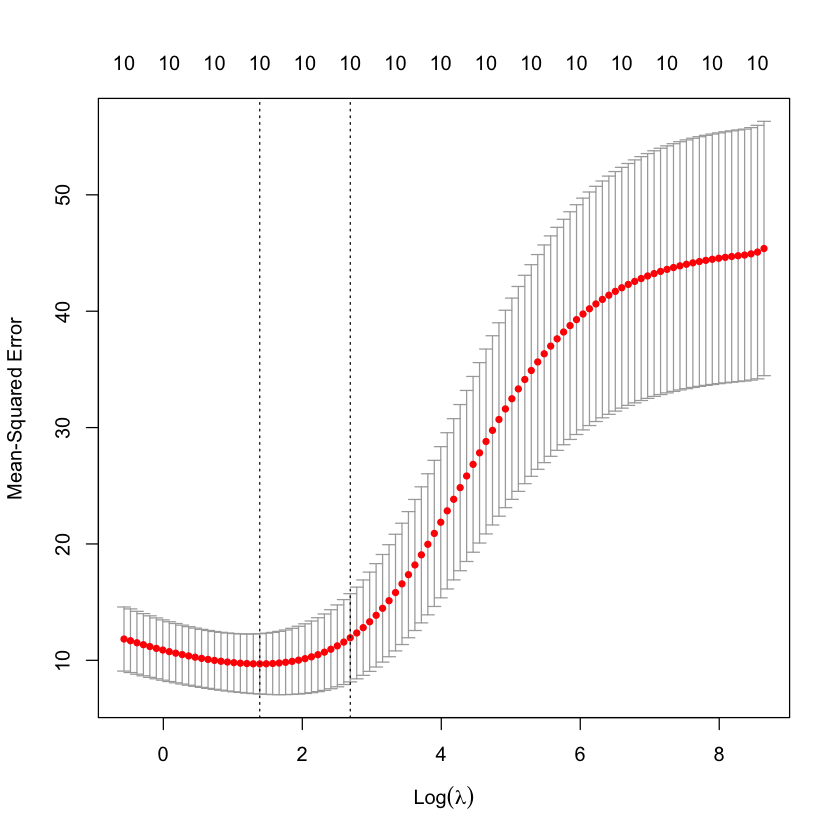

In [9]:
# Fit Ridge regression model
ridge_model <- glmnet(x_train, y_train, alpha = 0)

# Cross-validation to select optimal lambda
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0)
optimal_lambda_ridge <- cv_ridge$lambda.min

# Plot the cross-validation results
plot(cv_ridge)

# Coefficients at optimal lambda
coef(ridge_model, s = optimal_lambda_ridge)

In [13]:
x <- model.matrix(mpg ~ ., data = mtcars)[, -1]  # predictor matrix without intercept
y <- mtcars$mpg

predictions <- predict(ridge_model, s = optimal_lambda_ridge, newx = x)

In [14]:
# Calculate Mean Squared Error (MSE)
mse <- mean((y - predictions)^2)
cat("Mean Squared Error (MSE):", mse, "\n")

Mean Squared Error (MSE): 5.451328 


In [15]:
# Calculate R-squared
sst <- sum((y - mean(y))^2)  # Total Sum of Squares
sse <- sum((y - predictions)^2)  # Sum of Squared Errors
r_squared <- 1 - (sse / sst)
cat("R-squared:", r_squared, "\n")

R-squared: 0.8450842 


In [17]:
# Calculate Adjusted R-squared
n <- length(y)            # Number of observations
p <- length(coef(ridge_model, s = optimal_lambda_ridge)) - 1  # Number of predictors (excluding intercept)
adjusted_r_squared <- 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
cat("Adjusted R-squared:", adjusted_r_squared, "\n")

Adjusted R-squared: 0.7713148 


##### <div class="alert alert-block alert-success"> Lasso Regression </div>

In Lasso regression, the penalty term \( \lambda \sum_{j=1}^p |\beta_j| \) can shrink some coefficients to zero, effectively performing variable selection. Lasso is particularly useful when we suspect that only a subset of the predictors are important.

#### R Code for Lasso Regression
We'll use `glmnet` with `alpha = 1` to specify Lasso regression.

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


11 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 38.41947251
cyl         -1.31122398
disp         .         
hp          -0.00655791
drat         .         
wt          -2.73823244
qsec         .         
vs           .         
am           .         
gear         .         
carb        -0.09716831

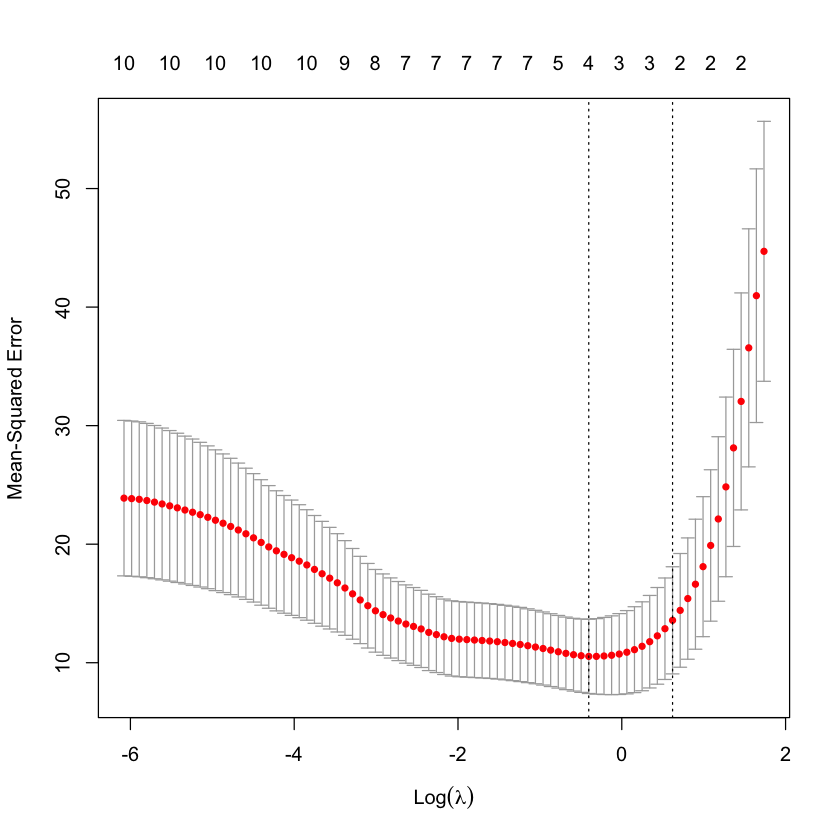

In [4]:
# Fit Lasso regression model
lasso_model <- glmnet(x_train, y_train, alpha = 1)

# Cross-validation to select optimal lambda
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)
optimal_lambda_lasso <- cv_lasso$lambda.min

# Plot the cross-validation results
plot(cv_lasso)

# Coefficients at optimal lambda
coef(lasso_model, s = optimal_lambda_lasso)

##### <div class="alert alert-block alert-info"> Comparing Ridge and Lasso Regression </div>

1. **Ridge Regression**:
   - Shrinks all coefficients but retains all predictors.
   - Often useful when all predictors are expected to contribute somewhat to the response variable.

2. **Lasso Regression**:
   - Sets some coefficients to zero, performing variable selection.
   - Useful when we suspect only a subset of predictors are important.

#### Key Differences:
- **Model Interpretation**: Lasso provides a simpler model with fewer predictors, which can improve interpretability.
- **Multicollinearity**: Both methods handle multicollinearity, but Ridge is more effective for highly correlated predictors.

##### <div class="alert alert-block alert-info"> Prediction and Model Evaluation </div>

Now that we've fit Ridge and Lasso models, we can use them to make predictions on the test set and evaluate their performance.

In [5]:
# Predict on test data for Ridge and Lasso
ridge_predictions <- predict(ridge_model, s = optimal_lambda_ridge, newx = x_test)
lasso_predictions <- predict(lasso_model, s = optimal_lambda_lasso, newx = x_test)

# Calculate Mean Squared Error (MSE) for both models
ridge_mse <- mean((y_test - ridge_predictions)^2)
lasso_mse <- mean((y_test - lasso_predictions)^2)

cat("Ridge MSE:", ridge_mse, "\n")
cat("Lasso MSE:", lasso_mse, "\n")

Ridge MSE: 3.47318 
Lasso MSE: 4.195264 


##### <div class="alert alert-block alert-info"> Practical Considerations </div>

When selecting between Ridge and Lasso regression, consider the following:
- **Interpretability**: Lasso provides a more interpretable model by removing non-informative predictors.
- **Data Characteristics**: Ridge regression is suitable when you believe all predictors may contribute, while Lasso is beneficial when some predictors are likely unimportant.
- **Computational Efficiency**: Lasso’s variable selection can be advantageous in high-dimensional datasets where sparsity is expected.



##### Summary:
- **Ridge Regression**: Retains all predictors, effective for multicollinearity.
- **Lasso Regression**: Performs variable selection, resulting in a simpler model.

These regularization techniques are powerful tools for controlling model complexity and enhancing interpretability in regression analysis.

#### <div class="alert alert-block alert-danger"><b>Practice Exercise</b></div>

Now it's your turn to practice model selection techniques.

1. Choose a dataset we have worked with in previous chapters, or stick with `mtcars`.
2. Identify a continuous target variable and a set of predictors.
3. Use forward selection, backward selection, stepwise selection, and best subset selection to select the most relevant predictors.

**Questions to Consider**:
- What are the advantages of each selection method for your chosen dataset?
- How do the final models differ in terms of predictors chosen?
- What does AIC or adjusted R-squared tell you about each model?

**Tip**: Use the example code above to guide your analysis. Try exploring other datasets to solidify your understanding of model selection!